# Data types and flow control
### as commonly used in neuroscience
18 June 2021<br>
NRSC 7657<br>
Daniel J Denman and John Thompson<br>
University of Colorado Anschutz<br>
<br>

whether defined in native python (`str`, `int`, ...) or by a package `numpy.int16`,`numpy.ndarray`),
#### many data types are straighforward:

In [62]:
#float: any number with decimals
_float = 16.0
_float2 = 16.2

#int: any number without decimals. 
_int = 16
_float_fancy_saving_characters = 16.

#complex number are also a type but we won't have to use them much if ever in the normal course oof things:
_complex = complex(16,1)

strings are the way to do things with letters

In [14]:
_string = 'letters'

finally, native python ways to group things: lists and dictionaries. 

In [10]:
_list = [1,2,3]
_dict = {'key1':1,
         'key2':2.,
         'key3':'three'}

note that strings can be indexed like lists

In [15]:
_string[0]

'l'

another important native type: `bool`:

In [20]:
_bool = True

why did i put underscores? let's use `type()`, the python function for checkingcomparison `==` to see why

In [9]:
type(_float)

float

In [3]:
float == type(_float)

True

finally, floating point numbers have precision of encoding in computers, and this precision can matter (but usually won't). numpy as all the [numerical types](https://numpy.org/doc/stable/user/basics.types.html) you will need. 

In [61]:
import numpy as np

In [67]:
print(np.int16(_float2))
print(np.uint16(_float2))
print(np.uint8(_float2))
print(np.single(_float2))
print(np.double(_float2))

16
16
16
16.2
16.2


### This brings up namespaces - the way that variable names are defined. 
when you define something it lives in a *namespace* and has a *scope*. <br>
the kernel namespace is, in fact, a dictionary in the kernel. this fact that it is a dictinary is itself not important, but that it is a simple mapping is <br>
in the notebook, variables go in the kernal namespace, but they could also be in a function or classes's namespace. we will return to this as we make functions and classes today.

In [ ]:
#in ipython (like jupyter, or like in vscode) green things have a meaning in the namespace that you didn't define

## Everything in python is an object. 
This means that everything (...just about everything) has associated _properties_ and _methods_ <br>
_properties_ are values

_methods_ are code, generally functions

we will come back to this object-associated code, and how it becomes associated with some object, but here are some examples:

### Functions are ways to repeat code snippets that you have validated, without copying and pasting. 
A function can be thought of as a program that operates on input. Functions can have zero input argumnets, taking there inputs from a dynamic source, but more typically have 1+ input arguments which are passed in `()`. Functions only run when they are called. <br><br>
Let's recreate `startswith()` as our own function. We'll also go through some python flow control as we do. this will include `for`, `if-else`, `pass` and `break`, and `while` statements

In [ ]:
startswith()

** --> we just used `_string.startswith('l')`, why didn't this work? **

first, let's prototype what we want to accomplish in a cell or some cells

In [ ]:
def startswith():
    return 

don't forget default arguments

functions can be defined in a notebook, or imported from a .py file or package. 

other flow control: `try-except`, `while`
<br>also `switch-case` for MATLAB (and soon python)

## Classes: making your own objects
Classes are a way to make bundles of your own objects, entities with their own properties and methods that you define. 

In [41]:
class ThingWeMade:


when you use your class the first time, you are creating a new *instance* of that class. that instance has all of the* attributes*(*properties* and *methods* of the parent )

notice that i capitalized and camelcased or CapWords'd `ThingWeMade`. this is the convention according to [PEP8](https://www.python.org/dev/peps/pep-0008/#class-names). it is not required, but it might help you understand someone else's code if that person is following convention. (also PEP means Python Enhancement Proposal and it is where the core python developers propose, debate, and make rules and changes to how core python works.)

Finally, an example of inheritance:

In [52]:
class ABetterThing(ThingWeMade):


Classes are generally not something you'd create in a notebook workflow, although you could. You will find classes in more complete codebases especially in packages, where you will make an instance of a class and then pass it your data, so you can then use the class methods to do whatever it is (`scikit-learn`, the most popular and flexible ML codebase, works like this, where many of it's analyses are classes that you train and then you can use that trained class to test on other data.). One of my lab's behavioral paradigms is also a monster class. 

### Summary:
Why classes and functions? 
- organization: if you need to fix a bit of code, and it is in a function, you fix it once and then it works wherever it is called. if you copy pastaed...
- reproducability: your function does the thing it is expected to (if it is correct), and not some slighly different thing than the copy pastaed v4 of the code snippet
- readability: one line of a function call with a descriptive name is a lot more readable than a bunch of code. same for classes, ABetterThing.thing is more readable than many many variables with names like thing_for_ABetterThing. 

# some commonly encountered data structures

## numpy: ndarray
this is almost so ubiquitous it belongs above, in the basic data types section. the ndarray is the matrix of python, the n-dimensional data structure where most any data are stored and transformed.

In [21]:
import numpy as np

In [22]:
a = np.array([1,2,3])

array([1, 2, 3])

In [ ]:
type(a)

note that lists can be "ragged" (sometimes also called "jagged"), where as ndarrays (like matrices) are always rectangular

time series are 1D; images are 2D (or potentially 3D if color); movies are 3D (or potentially 4D if color). 

In [80]:
import matplotlib.pyplot as plt
im=plt.imread('for_NRSC7657.png')

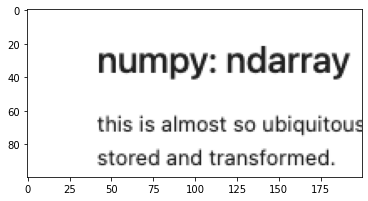

In [73]:
plt.imshow(im[:100,:200])

## pandas and .csv / .xlsx files
#### tables for your tabular data needs
if you were going to do that in Excel, you can do it with pandas. probably faster, and then you can do more stuff with the results

In [84]:
import pandas as pd

### HDF5 and .mat files
hdf5 is a Heirarchical Data Format, which has several nice features: good metadata, fast I/O (if implemented well), and good cross-platform portability. <br>
several data formates commonly used in neuroscience are in fact based on hdf5, including .mat files and NWB files (to be talked about later). for MATLAB .mat files, there are several options for loading into python:

you can think of hdf5 filles as nested dictionaries, with keys that take you down levels in the heirarchy of the heirarchical data format:

## Neurodata Without Borders
#### a unified format for neuroscience data
![nwb_schematic](https://www.nwb.org/wp-content/uploads/2020/02/nwb_datatypes_overview-1024x491.png)
<br>
the point is to have a useful cross-platform data format that has metadata in specific places, so that analysis tools and data are easier to share across labs. this is what file format is, same as .xlsx or .jpeg or .tiff, for example. 

In [144]:
!conda install -c conda-forge pynwb -y

Solving environment: done

## Package Plan ##

  environment location: /Users/danieljdenman/opt/anaconda3/envs/NRSC7657

  added / updated specs:
    - pynwb


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       h033912b_0         136 KB  conda-forge
    certifi-2021.5.30          |   py38h50d1736_0         141 KB  conda-forge
    openssl-1.1.1k             |       h0d85af4_0         1.9 MB  conda-forge
    ruamel.yaml-0.17.9         |   py38h96a0964_0         170 KB  conda-forge
    ruamel.yaml.clib-0.2.2     |   py38h5406a74_2         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

  hdmf               conda-forge/noarch::hdmf-1.5.4-py_0
  pynwb              conda-forge/noarch::pynwb-1.2.1-py_0
  python_abi 

In [145]:
import pynwb

In [150]:
f = h5py.File('/Users/danieljdenman/github/NRSC7657/Week2/session_719161530/session_719161530.nwb')

OSError: Unable to open file (truncated file: eof = 195297416, sblock->base_addr = 0, stored_eof = 3071442940)

In [149]:
f.keys()

<KeysViewHDF5 ['acquisition', 'analysis', 'epochs', 'file_create_date', 'general', 'identifier', 'nwb_version', 'processing', 'session_description', 'session_start_time', 'stimulus']>

finally, note that both John's lab and my lab are using this format, as are many labs (known at Allen, UCSF, NYU, Janelia)

note: there is also a set of tools for MATLAB: [MATNWB](https://neurodatawithoutborders.github.io/matnwb/)

## xarray
#### pandas functionality with more dimensions. alternatively, ndarrrays with labels

In [151]:
import xarray as xr

np.random.seed(123)

xr.set_options(display_style="html")

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

ds = xr.Dataset(
    {
        "tmin": (("time", "location"), tmin_values),
        "tmax": (("time", "location"), tmax_values),
    },
    {"time": times, "location": ["IA", "IN", "IL"]},
)

ds

<xarray.Dataset>
Dimensions:   (location: 3, time: 731)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2001-12-31
  * location  (location) <U2 'IA' 'IN' 'IL'
Data variables:
    tmin      (time, location) float64 -8.037 -1.788 -3.932 ... -1.346 -4.544
    tmax      (time, location) float64 12.98 3.31 6.779 ... 6.636 3.343 3.805

In [153]:
df = ds.to_dataframe()
df.head()

tmin       tmax
location time                            
IA       2000-01-01  -8.037369  12.980549
         2000-01-02  -9.341157   0.447856
         2000-01-03 -12.139719   5.322699
         2000-01-04  -7.492914   1.889425
         2000-01-05  -0.447129   0.791176

### JSON
another common format, kind of like hdf5 but way more general and not for large data. this is often configuration files or something that requires lots of nicely organized metadata. <br>
the `json` package comes with base python and is what to use to interact with JSON type data. like hdf5, it is basically a dictionary, so you can load it into a dictionary and if you have a dictionary you can dumps (save) it it into a JSON file

In [119]:
import json